# Web Scraping

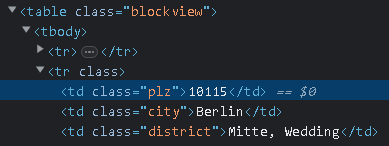

In [1]:
# import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# find url and store it in a variable
url = 'https://www.dastelefonbuch.de/Postleitzahlen/Berlin'

In [3]:
# download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [4]:
# parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
#soup.select("#content > table.blockview > plz")

soup.select("#content > table.blockview > tbody > tr:nth-child(2) > td.plz")[0].get_text()

'10115'

In [6]:
plz = []
city = []
district = []


for i in range(2,192):
    plz.append(soup.select("#content > table.blockview > tbody > tr:nth-child("+str(i)+") > td.plz")[0].get_text())
    city.append(soup.select("#content > table.blockview > tbody > tr:nth-child("+str(i)+") > td.city")[0].get_text())
    district.append(soup.select("#content > table.blockview > tbody > tr:nth-child("+str(i)+") > td.district")[0].get_text())

In [7]:
postal_codes = pd.DataFrame({"postal_codes":plz,"city":city,"district":district})

In [8]:
postal_codes

,postal_codes,city,district
0,10115,Berlin,"Mitte, Wedding"
1,10117,Berlin,"Mitte, Tiergarten"
2,10119,Berlin,"Mitte, Prenzlauer Berg"
3,10178,Berlin,Mitte
4,10179,Berlin,"Friedrichshain, Kreuzberg, Mitte"
...,...,...,...
185,14169,Berlin,"Dahlem, Lichterfelde, Zehlendorf"
186,14193,Berlin,"Dahlem, Grunewald, Schmargendorf, Westend"
187,14195,Berlin,"Dahlem, Grunewald, Lichterfelde, Schmargendorf..."
188,14197,Berlin,"Friedenau, Schmargendorf, Steglitz, Wilmersdorf"


In [9]:
postal_codes.to_csv('postal.csv')